## Temel Bileşen Analizi Örneği

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

# iris data set
from sklearn.datasets import load_iris

### Veriyi yükleyelim

In [2]:
# veriyi yükle
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
y = iris.target
df = pd.DataFrame(data, columns = feature_names)
df["sinif"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Temel Bileşen Analizi Uygulayalım.

In [3]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten = True) # whiten = normalize
pca.fit(data)
x_pca = pca.transform(data)
print("Variance Ratio : ", pca.explained_variance_ratio_)
print("Sum : ", sum(pca.explained_variance_ratio_))

Variance Ratio :  [0.92461872 0.05306648]
Sum :  0.9776852063187949


### Temel Bileşenleri Görselleştirelim

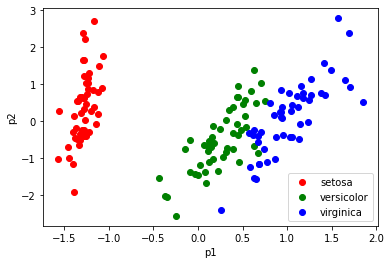

In [4]:
# Grafik çizimi
df["p1"] = x_pca[:, 0]
df["p2"] = x_pca[:, 1]
color = ["red", "green", "blue"]
for each in range(3):
    plt.scatter(df.p1[df.sinif == each], df.p2[df.sinif == each], 
        color = color[each], label = iris.target_names[each])
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()


### PCA ve Kernel PCA karşılaştırması yapalım

In [5]:
# PCA ve kernel PCA karşılaştırma örneği
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X, y = make_circles(n_samples = 1_000, factor = 0.3, noise = 0.05, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### Görselleştirelim

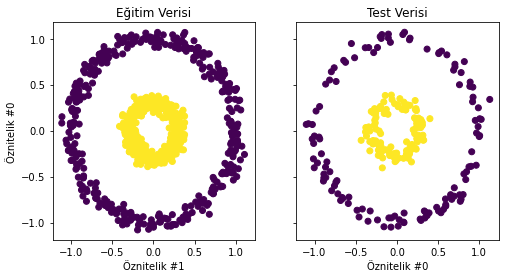

In [6]:
# Görsel
_, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex = True, sharey = True, figsize = (8, 4))
# train görseli
train_ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
train_ax.set_xlabel("Öznitelik #1")
train_ax.set_ylabel("Öznitelik #0")
train_ax.set_title("Eğitim Verisi")
# test görseli
test_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
test_ax.set_xlabel("Öznitelik #0")
_ = test_ax.set_title("Test Verisi")
plt.show()

### PCA ve Kernal PCA İşlemleri, burada fit ve transform bir arada yapılıyor.

In [8]:
# PCA, kernel PCA işleri, fit ve transform bir arada yapılıyor.
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components = 2)
kernel_pca = KernelPCA(n_components = None, kernel = "rbf", gamma = 10, 
    fit_inverse_transform = True, alpha = 0.1 )
X_test_pca = pca.fit(X_train).transform(X_test)
x_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

### Görselleştirelim

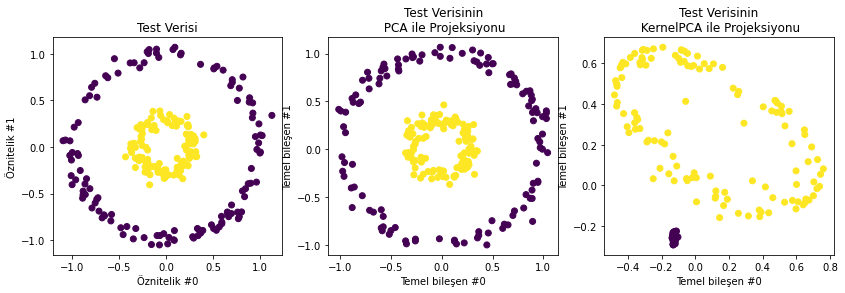

In [9]:
# Görselleştirelim
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols = 3, figsize = (14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test)
pca_proj_ax.set_ylabel("Temel bileşen #1")
pca_proj_ax.set_xlabel("Temel bileşen #0")
pca_proj_ax.set_title("Test Verisinin\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(x_test_kernel_pca[:, 0], x_test_kernel_pca[:, 1], c = y_test)
kernel_pca_proj_ax.set_ylabel("Temel bileşen #1")
kernel_pca_proj_ax.set_xlabel("Temel bileşen #0")
kernel_pca_proj_ax.set_title("Test Verisinin\n KernelPCA ile Projeksiyonu")

plt.show()

### Inverse Transform İşlemi

In [10]:
# reconstruciton - Geri oluşturma
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

### Görselleştirelim

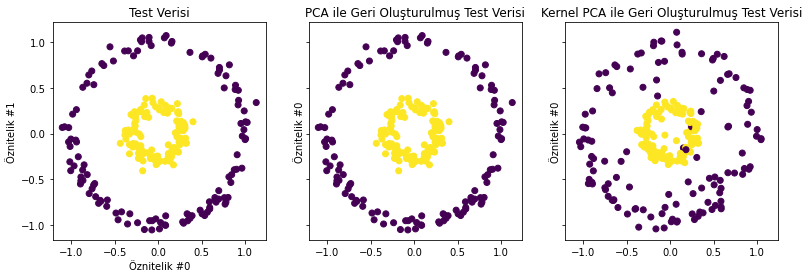

In [11]:
# Görselleştirelim
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols = 3, sharex = True, sharey = True, figsize = (13, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c = y_test)
pca_back_proj_ax.set_ylabel("Öznitelik #0")
pca_back_proj_ax.set_title("PCA ile Geri Oluşturulmuş Test Verisi")

kernel_pca_back_proj_ax.scatter(X_reconstructed_kernel_pca[:, 0], 
    X_reconstructed_kernel_pca[:, 1], c = y_test)
kernel_pca_back_proj_ax.set_ylabel("Öznitelik #0")
kernel_pca_back_proj_ax.set_title("Kernel PCA ile Geri Oluşturulmuş Test Verisi")

plt.show()